<a href="https://colab.research.google.com/github/JuanSBernalF/ConexionGithub/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 2 - Analítica de negocios II

Por: Juan Sebastián Bernal Forero

**Orden del Documento**:

1. En primer lugar, se instalarán las librerias correspondientes para el manejo y análisis de la información. Posteriormente se cargará el archivo y luego se parametrizarán los datos para darles el tratamiento adecuado.

2. En segundo lugar, se procederá a dar algunas aclaraciones generales y procedimentales para el desarrollo del ejercicio.

3. Por último, se procederá a la realización de las pruebas correspondientes, en relación a las preguntas planteadas para el análisis.

###Instalación de librerías

In [ ]:
install.packages("readr")
library(readr)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



###Carga de archivos

In [ ]:
wow<-read.csv("/content/data_wowAN2-20231S - data_wowAN2.csv")

In [ ]:
head(wow)

,ID,tipoplan,churn,consumomes,Estrato,Sexo,Edad,EstadoCivil,Educacion,Recomienda,rango_antiguedad,servicio_adicional,gigas_cons
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,Empresarial Ejecutivo,1,378.645,1-2,Masculino,Menor a 25,Soltero/a,Profesional,Neutro,250+,3,"14,3"
2,2,Empresarial Ejecutivo,0,841.333,1-2,Masculino,Menor a 25,Soltero/a,Profesional,Neutro,72 - 158,2,"14,5"
3,3,Prepago,1,861.967,3-4,Masculino,Menor a 25,Soltero/a,Técnico,No recomienda,250+,3,"10,9"
4,4,Postpago cuenta control,1,84.520,3-4,Masculino,Menor a 25,Soltero/a,Técnico,No recomienda,250+,4,"19,0"
5,5,Postpago cuenta control,0,157.160,3-4,Masculino,Menor a 25,Separado/a,Profesional,Neutro,250+,1,"13,1"
6,6,Empresarial Ejecutivo,1,104.640,3-4,Masculino,Menor a 25,Casado/a,Profesional,Recomienda,250+,4,"24,7"


### Cambios en los tipos de datos

In [ ]:
#cambiamos de character a numeric poniendo comas en el lugar que teníamos puntos
wow$consumomes<-as.numeric(gsub(",",".", wow$consumomes))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
summary(wow$consumomes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  13.42   96.67  152.85  216.61  246.76  986.93      73 

In [ ]:
wow$gigas_cons<-as.numeric(gsub(",",".", wow$gigas_cons))
summary(wow$gigas_cons)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   15.90   19.90   20.17   23.60   99.60 

In [ ]:
head(wow)

,ID,tipoplan,churn,consumomes,Estrato,Sexo,Edad,EstadoCivil,Educacion,Recomienda,rango_antiguedad,servicio_adicional,gigas_cons
,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,1,Empresarial Ejecutivo,1,378.645,1-2,Masculino,Menor a 25,Soltero/a,Profesional,Neutro,250+,3,14.3
2,2,Empresarial Ejecutivo,0,841.333,1-2,Masculino,Menor a 25,Soltero/a,Profesional,Neutro,72 - 158,2,14.5
3,3,Prepago,1,861.967,3-4,Masculino,Menor a 25,Soltero/a,Técnico,No recomienda,250+,3,10.9
4,4,Postpago cuenta control,1,84.520,3-4,Masculino,Menor a 25,Soltero/a,Técnico,No recomienda,250+,4,19.0
5,5,Postpago cuenta control,0,157.160,3-4,Masculino,Menor a 25,Separado/a,Profesional,Neutro,250+,1,13.1
6,6,Empresarial Ejecutivo,1,104.640,3-4,Masculino,Menor a 25,Casado/a,Profesional,Recomienda,250+,4,24.7


## Punto 1. ¿Cómo podría explicarse el consumo mensual mediante las gigas consumidas del plan y los servicios adicionales contratados?


Nuestro objetivo será estimar un modelo que permita explicar el consumo de los usuarios en función de las gigas consumidas en el plan y de los servicios adicionales contratados

Para el desarrollo de este punto estimaremos un modelo por medio de una regresion de tipo lineal simple y, posteriormente, avanzaremos realizando iteraciones en las cuales se transformarán las variables a logarítmos, planteando así modelos de tipo lin-log, log-log y log-lin, con el objetivo de encontrar el mejor modelo posible que explique mejor el consumo de los usuarios en función de las gigas consumidas y los servicios adicionales contratados. Para ello, nos basaremos en la metodología **Box Jenkins** que consiste en:

1) Identificación

2) Estimación

3) Diagnóstico.

1. Identificación

**a. Formular la FRP:**

> $Y=β_0+β_1X_1+β_2X_2+β_3X_3+ .... +β_kX_k+ε$

es decir:

> $Consumomes $$=β_0+β_1(gigas\_cons)+β_2(servicio\_adicional)+ .... +β_kX_k+ε$

**b. Formular la FRM**

> $Consumomes $$(y^*)=β_0^*+β_1^*(gigas\_cons)+β_2^*(servicio\_adicional)+ .... +β_kX_k+e$




##Estimación del punto 1

Calcular el  β∗  ------> min( e )

In [ ]:
modregconsum<-lm(consumomes~gigas_cons+servicio_adicional,data=wow)
summary(modregconsum)


Call:
lm(formula = consumomes ~ gigas_cons + servicio_adicional, data = wow)

Residuals:
    Min      1Q  Median      3Q     Max 
-251.14 -121.37  -61.70   40.33  798.60 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        128.5784    12.0704   10.65   <2e-16 ***
gigas_cons          -0.1964     0.3776   -0.52    0.603    
servicio_adicional  39.4524     3.6060   10.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 189.8 on 1769 degrees of freedom
  (73 observations deleted due to missingness)
Multiple R-squared:  0.0634,	Adjusted R-squared:  0.06234 
F-statistic: 59.88 on 2 and 1769 DF,  p-value: < 2.2e-16


###Diagnóstico primera iteración.
####Significancia Global
La prueba de significancia global "F-statistic" sugiere, para este modelo, que el p-value es menor que alfa, de modo que, el modelo ajusta los datos.
####Significancia Individual
La prueba sugiere que tanto el intercepto como la variale servicios adicionales aportan al modelo, sin embargo, la variable sobre el numero de gigas consumidas no aporta al modelo. Por lo tanto, vamos a transformar la variable gigas_cons y, en caso de no aportar en la explicación del consumo, será eliminada.
####Coeficiente de determinación R cuadrado
El R cuadrado tiene un valor de 0,063. Es un modelo aceptable, porque explica el consumo mediante las gigas y servicios adicionales en un 6,3% de su variabilidad, el restante 93,8% de variabilidad explicada corresponde al error (factores no medidos y no observados)

Por su parte el R cuadrado ajustado sugiere que el modelo no incluye información irrelevante, pues la diferencia con el R cuadrado es del 0,001, es decir, del 0,1%.

### Transformación por Logarítmos

1). Log-Log: transformación tanto de Y como de X

  Log($Y)=β_0+β_1(log(X_1))+β_2(log(X_2))+β_3(log(X_3))+ .... +β_kX_k+ε$

2). Log-Lin: Transformación de Y manteniendo X lineal

Log($Y)=β_0+β_1X_1+β_2X_2+β_3X_3+ .... +β_kX_k+ε$

3). Lin-Log: Mantener Y lineal y Transformar X
    
$Y=β_0+β_1(log(X_1))+β_2(log(X_2))+β_3(log(X_3))+ .... +β_kX_k+ε$

##Iteración#2 LOG-LOG
Vamos a estimar el modelo 1 transformando las variables en log-log, para ello primero transformamos las variables en logaritmos naturales.



In [ ]:
wow$logconsumo<-log(wow$consumomes)
wow$logservicios<-log(wow$servicio_adicional)
wow$loggigas<-log(wow$gigas_cons)


In [ ]:
#necesitamos eliminar los NA´s
wow<-drop_na(wow)
wow_consum = na.exclude(wow$consumomes)

In [ ]:
wow_pos<-subset(wow, loggigas>0, select=c(logconsumo, loggigas, logservicios))
mod2_loglogconsum<-lm(logconsumo~loggigas + logservicios, data=wow_pos)
summary(mod2_loglogconsum)



Call:
lm(formula = logconsumo ~ loggigas + logservicios, data = wow_pos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.19716 -0.54210 -0.06045  0.48448  2.06502 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.87171    0.07675  63.476   <2e-16 ***
loggigas     -0.02536    0.02572  -0.986    0.324    
logservicios  0.38320    0.03012  12.724   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7609 on 1755 degrees of freedom
Multiple R-squared:  0.08448,	Adjusted R-squared:  0.08344 
F-statistic: 80.98 on 2 and 1755 DF,  p-value: < 2.2e-16


## Iteración 3 modelo lin-log

In [ ]:
wow_linlog<-subset(wow, loggigas>0, select=c(consumomes, loggigas, logservicios))
mod3_linlogconsum<-lm(consumomes ~ loggigas+logservicios, data=wow_linlog)
summary(mod3_linlogconsum)


Call:
lm(formula = consumomes ~ loggigas + logservicios, data = wow_linlog)

Residuals:
    Min      1Q  Median      3Q     Max 
-238.86 -121.82  -62.12   40.22  801.76 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   165.875     19.208   8.636   <2e-16 ***
loggigas       -1.400      6.436  -0.218    0.828    
logservicios   81.328      7.538  10.790   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 190.4 on 1755 degrees of freedom
Multiple R-squared:  0.06229,	Adjusted R-squared:  0.06122 
F-statistic: 58.29 on 2 and 1755 DF,  p-value: < 2.2e-16


## Iteración 4 LOGLIN

In [ ]:
wow_loglin<-subset(wow, select=c(logconsumo, gigas_cons, servicio_adicional))
mod4_loglinconsum<-lm(logconsumo ~ gigas_cons+servicio_adicional, data=wow_loglin)
summary(mod4_loglinconsum)


Call:
lm(formula = logconsumo ~ gigas_cons + servicio_adicional, data = wow_loglin)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21474 -0.53669 -0.05606  0.49110  2.04663 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.661871   0.048367  96.386   <2e-16 ***
gigas_cons         -0.001583   0.001513  -1.047    0.295    
servicio_adicional  0.183662   0.014449  12.711   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7606 on 1769 degrees of freedom
Multiple R-squared:  0.08392,	Adjusted R-squared:  0.08289 
F-statistic: 81.03 on 2 and 1769 DF,  p-value: < 2.2e-16


##Diagnóstico iteraciones 2, 3, 4 y 5.

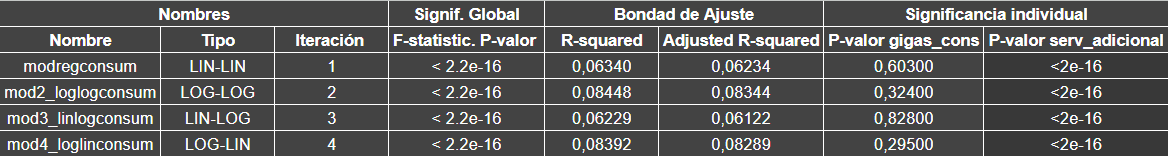

###Diagnósticos Básicos
####Significancia Global
La prueba de significancia global "F-statistic" sugiere, para estos modelos, que el p-value es menor que alfa, de modo que, los modelos ajustan los datos.
####Significancia Individual
Las pruebas realizadas en las diferentes iteraciones sugieren que la variale servicios adicionales es la única que aporta al modelo. Pues se evidenció que a pesar de haber realizado las transformaciones correspondientes, usando logarítmos, la variable gigas_cons sigue sin aportar al modelo.
####Coeficiente de determinación R cuadrado
El modelo que nos generó un mejor coeficiente de determinación fue el realizado en la iteración 2 transformando tanto la variable dependiente y las independientes en logarítmos. Éste, explica el consumo mediante las gigas y servicios adicionales en un 8,4% de su variabilidad, el restante 91,6% de variabilidad explicada corresponde al error (factores no medidos y no observados).

Por su parte el R cuadrado ajustado sugiere que los modelos no incluyen información irrelevante, pues en promedio la diferencia con el R cuadrado es del 0,001, es decir, del 0,1%.

## Iteraciones sin gigas

**Vamos a mejorar el modelo usando el criterio de Parsimonia, de modo que, eliminaremos la variable gigas_cons del modelo pues, gracias a las pruebas de significancia individual realizadas, pudimos notar que la variable no aporta significativamente a nuestro modelo.**

##Iteración 5 Lin-Lin sin gigas


In [ ]:
mod5_linlinconsum<-lm(consumomes~+servicio_adicional,data=wow)
summary(mod5_linlinconsum)


Call:
lm(formula = consumomes ~ +servicio_adicional, data = wow)

Residuals:
    Min      1Q  Median      3Q     Max 
-247.13 -120.76  -62.92   39.84  799.88 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         124.731      9.537   13.08   <2e-16 ***
servicio_adicional   39.402      3.604   10.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 189.8 on 1770 degrees of freedom
Multiple R-squared:  0.06326,	Adjusted R-squared:  0.06273 
F-statistic: 119.5 on 1 and 1770 DF,  p-value: < 2.2e-16


##Iteración 6 Log-Log Sin Gigas

In [ ]:
mod6_loglogconsum<-lm(logconsumo~logservicios, data=wow_pos)
summary(mod6_loglogconsum)


Call:
lm(formula = logconsumo ~ logservicios, data = wow_pos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.20421 -0.53833 -0.05162  0.47894  2.07015 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.80096    0.02726  176.13   <2e-16 ***
logservicios  0.38147    0.03007   12.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7609 on 1756 degrees of freedom
Multiple R-squared:  0.08398,	Adjusted R-squared:  0.08345 
F-statistic:   161 on 1 and 1756 DF,  p-value: < 2.2e-16


##Iteración 7 Lin-Log Sin Gigas





In [ ]:
mod7_linlogconsum<-lm(consumomes~logservicios, data=wow_linlog)
summary(mod7_linlogconsum)


Call:
lm(formula = consumomes ~ logservicios, data = wow_linlog)

Residuals:
    Min      1Q  Median      3Q     Max 
-238.82 -121.96  -62.03   40.33  802.04 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   161.969      6.820   23.75   <2e-16 ***
logservicios   81.233      7.523   10.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 190.4 on 1756 degrees of freedom
Multiple R-squared:  0.06227,	Adjusted R-squared:  0.06173 
F-statistic: 116.6 on 1 and 1756 DF,  p-value: < 2.2e-16


##Iteración 8 Log-Lin Sin Gigas


In [ ]:
mod8_loglinconsum<-lm(logconsumo~servicio_adicional, data=wow_loglin)
summary(mod8_loglinconsum)


Call:
lm(formula = logconsumo ~ servicio_adicional, data = wow_loglin)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21736 -0.53196 -0.05016  0.48865  2.05700 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.63085    0.03822  121.15   <2e-16 ***
servicio_adicional  0.18326    0.01444   12.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7606 on 1770 degrees of freedom
Multiple R-squared:  0.08336,	Adjusted R-squared:  0.08284 
F-statistic:   161 on 1 and 1770 DF,  p-value: < 2.2e-16


## Diagnóstico Iteraciones 5, 6, 7 y 8.
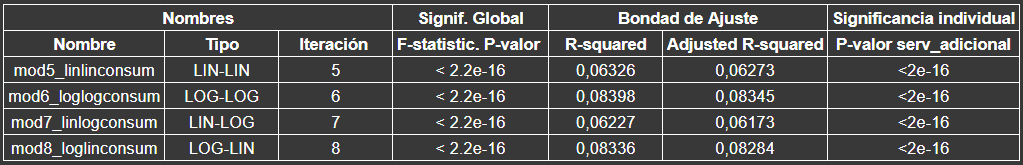

###Diagnósticos básicos
####Significancia Global
La prueba de significancia global "F-statistic" sugiere, para estos modelos, que el p-value es menor que alfa, de modo que, los modelos ajustan los datos.
####Significancia Individual
Las pruebas realizadas en las diferentes iteraciones, al igual que en los puntos anteriores, muestran que la variable servicios adicionales aporta al modelo. Pues, el p-valor con un valor de <2e-16,  es menor que el nivel asignado al estadístico de contraste de 0.05, por tanto rechazamos la hipótesis nula "la variable no aporta al modelo" y concluímos que la variable sí aporta al modelo.
####Coeficiente de determinación R cuadrado
Los modelos que nos generaron un mejor coeficiente de determinación siguiendo el criterio de Parsimonia fueron los realizados en las iteraciones 6 y 8, en los que usamos transformaciones Log-Log y Log-Lin respectivamente. Es interesante ver que ambos presentaron valores bastante similares en la prueba
explicando  el consumo mediante los servicios adicionales en un 8,39% y 8,33% de su variabilidad, los restantes 91,61 y 91,67% de variabilidad explicada corresponde al error (factores no medidos y no observados).

Por su parte el R cuadrado ajustado sugiere que los modelos no incluyen información irrelevante, pues en promedio la diferencia con el R cuadrado es del 0,001, es decir, del 0,1%.

## Punto 2. ¿Es posible obtener un cálculo de la variación porcentual (elasticidad) del consumo por el aumento en el consumo de gigas adicionales y los servicios adicionales?

Para el desarrollo de este punto podremos usar las iteraciones numero 2 y 4 de nuestro taller, en las cuales, podremos contrastar el efecto de las variaciones en las variables independientes sobre el comportamiento de nuestra variable objetivo. Usaremos las iteraciones 2 y 4 puesto que en ellas hemos realizado transformaciones a las variables para crear modelos LOG-LOG y LOG-LIN respectivamente, lo cual, nos permitirá calcular la variación porcentual del consumo por el aumento en las variables "gigas_cons" y "servicio_adicional".



In [ ]:
#Iteración 2
mod2_loglogconsum<-lm(logconsumo~loggigas + logservicios, data=wow_pos)
summary(mod2_loglogconsum)
#Iteración 4
mod4_loglinconsum<-lm(logconsumo ~ gigas_cons+servicio_adicional, data=wow_loglin)
summary(mod4_loglinconsum)




Call:
lm(formula = logconsumo ~ loggigas + logservicios, data = wow_pos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.19716 -0.54210 -0.06045  0.48448  2.06502 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.87171    0.07675  63.476   <2e-16 ***
loggigas     -0.02536    0.02572  -0.986    0.324    
logservicios  0.38320    0.03012  12.724   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7609 on 1755 degrees of freedom
Multiple R-squared:  0.08448,	Adjusted R-squared:  0.08344 
F-statistic: 80.98 on 2 and 1755 DF,  p-value: < 2.2e-16



Call:
lm(formula = logconsumo ~ gigas_cons + servicio_adicional, data = wow_loglin)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21474 -0.53669 -0.05606  0.49110  2.04663 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.661871   0.048367  96.386   <2e-16 ***
gigas_cons         -0.001583   0.001513  -1.047    0.295    
servicio_adicional  0.183662   0.014449  12.711   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7606 on 1769 degrees of freedom
Multiple R-squared:  0.08392,	Adjusted R-squared:  0.08289 
F-statistic: 81.03 on 2 and 1769 DF,  p-value: < 2.2e-16


####**Iteración 2**
A un cambio en el consumo de servicios adicionales en 1%, el consumo variará positivamente en un 38,32%. Mientras que, para las gigas consumidas, aparentemente la relación es inversa, indicando así que a medida que se aumente el consumo de gigas en 1%, el consumo variará negativamente en un 2,5%. No obstante, dado que las pruebas de significancia individual nos recomiendan no tener en muy en cuenta esta última variable, es interesante ver su comportamiento dentro del modelo.


####**Iteración 4**
A un cambio en el consumo de servicios adicionales en 1 unidad, el consumo variará positivamente en un 18%. Mientras que, para las gigas consumidas, aparentemente la relación es inversa, indicando así que a medida que se aumente el consumo de gigas en 1 unidad, el consumo variará negativamente en un 1,15%. No obstante, dado que las pruebas de significancia individual nos recomiendan no tener en muy en cuenta esta última variable, es interesante ver su comportamiento dentro del modelo.


####RECOMENDACIÓN PUNTOS 1 Y 2:
Claudia, como la hábil estratega que es, al tener en cuenta que el consumo de servicios adicionales tiene una incidencia mayor que un incremento en las gigas adicionales en el consumo mensual de los clientes, podría diseñar un conjunto de estrategias encaminadas a lograr que sus clientes acepten usar **servicios adicionales** a los que comunmente acostumbran. Así, por cada servicio adicional que logre venderle a sus clientes, podría incrementar en cerca de 18% el consumo mensual de cada uno.

Algunas ideas para que pueda desarrollar tales estrategias podría ser la oferta de "paquetes de servicios", en los cuales, mediante una propuesta atractiva, pueda combinar diferentes servicios ofrecidos por WOW y así estimular a sus consumidores a obtener más de un solo servicio de la compañía. Por otra parte, podría generar promociones para que, gracias al uso de un determinado servicio, los consumidores tengan descuentos especiales para la adquisición de otros, algo que podría ocasionar una mayor utilización de los servicios ofrecidos.

##Punto 3. ¿Podría encontrarse una mejor explicación del consumo mensual si se incluyen todas las variables disponibles (categóricas y escalares) en el modelo?


Para el desarrollo de este punto vamos, en primer lugar, a desarrollar un modelo que incluya todas las variables (útiles) de nuestros datos disponibles, lo cual nos permitirá ver cuáles son aquellas variables que tienen una incidencia menor o mayor sobre el consumo de los servicios de WOW. Algo, que para Claudia será un insumo que le permitirá conocer más a sus clientes y la manera en que estos usan los servicios de la empresa para la que trabaja.

Posterior a ello, desarrollaremos modelos usando aquellas variables que tienen una mayor incidencia en la explicación del consumo mensual y haremos las respectivas recomendaciones.




In [ ]:
head(wow)

,ID,tipoplan,churn,consumomes,Estrato,Sexo,Edad,EstadoCivil,Educacion,Recomienda,rango_antiguedad,servicio_adicional,gigas_cons,logconsumo,logservicios,loggigas
,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Empresarial Ejecutivo,1,378.645,1-2,Masculino,Menor a 25,Soltero/a,Profesional,Neutro,250+,3,14.3,5.936599,1.0986123,2.660260
2,2,Empresarial Ejecutivo,0,841.333,1-2,Masculino,Menor a 25,Soltero/a,Profesional,Neutro,72 - 158,2,14.5,6.734988,0.6931472,2.674149
3,3,Prepago,1,861.967,3-4,Masculino,Menor a 25,Soltero/a,Técnico,No recomienda,250+,3,10.9,6.759217,1.0986123,2.388763
4,4,Postpago cuenta control,1,84.520,3-4,Masculino,Menor a 25,Soltero/a,Técnico,No recomienda,250+,4,19.0,4.436988,1.3862944,2.944439
5,5,Postpago cuenta control,0,157.160,3-4,Masculino,Menor a 25,Separado/a,Profesional,Neutro,250+,1,13.1,5.057264,0.0000000,2.572612
6,6,Empresarial Ejecutivo,1,104.640,3-4,Masculino,Menor a 25,Casado/a,Profesional,Recomienda,250+,4,24.7,4.650526,1.3862944,3.206803


In [ ]:
wow$tipoplan<-as.factor(wow$tipoplan)
wow$Estrato<-as.factor(wow$Estrato)
wow$Sexo<-as.factor(wow$Sexo)
wow$Edad<-as.factor(wow$Edad)
wow$EstadoCivil<-as.factor(wow$EstadoCivil)
wow$Educacion<-as.factor(wow$Educacion)
wow$Recomienda<-as.factor(wow$Recomienda)
wow$rango_antiguedad<-as.factor(wow$rango_antiguedad)


In [ ]:
mod9tod_var<-lm(consumomes ~ .-ID -consumomes -gigas_cons -logconsumo -loggigas -logservicios,data=wow)
summary(mod9tod_var)


Call:
lm(formula = consumomes ~ . - ID - consumomes - gigas_cons - 
    logconsumo - loggigas - logservicios, data = wow)

Residuals:
    Min      1Q  Median      3Q     Max 
-476.53 -113.87  -56.49   39.53  818.41 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      265.367     50.661   5.238 1.82e-07 ***
tipoplanEmpresarial Ejecutivo   -122.267     44.848  -2.726  0.00647 ** 
tipoplanPostpago abierto         224.341     70.377   3.188  0.00146 ** 
tipoplanPostpago cuenta control -149.369     45.201  -3.305  0.00097 ***
tipoplanPrepago                 -140.655     45.678  -3.079  0.00211 ** 
churn                             21.732      8.992   2.417  0.01575 *  
Estrato1-2                       -18.833     15.943  -1.181  0.23765    
Estrato3-4                       -11.133     16.330  -0.682  0.49549    
Estrato5-6                       -10.291     30.979  -0.332  0.73978    
SexoMasculino                     -4.7

####Diagnósticos básicos
####Significancia Global
La prueba de significancia global "F-statistic" sugiere, para este modelo, que el p-value es menor que alfa, de modo que, el modelo ajusta los datos.

####Significancia Individual
Las pruebas de significancia individual nos muestran que aquellas variables que aportan en nuestro modelo y sirven para explicar el consumo son: **tipo de plan**,**churn** y **servicio_adicional**. Esto, debido a que los p-valores arrojados por la prueba, para las tres variables, son menores al valor del alfa 0.05. Por lo tanto, rechazamos hipótesis nula (la variable no aporta), aceptamos hipótesis alterna y afirmamos que las variables sí aportan dentro del modelo.

####Coeficiente de determinación R cuadrado

El Coeficiente de determinación R cuadrado mostró, para el modelo "mod9tod_var", que las variables usadas explican el consumo en un 10,41% de su variabilidad. El restante 89,9% corresponde a los factores no medidos y no observados "ε".



**Vamos a iterar el modelo esta vez usando solamente las variables que aportan al modelo para, de esta manera, estimar un modelo sin datos irrelevantes.**

In [ ]:
mod10<-lm(consumomes ~ tipoplan+ churn + servicio_adicional, data=wow)
summary(mod10)


Call:
lm(formula = consumomes ~ tipoplan + churn + servicio_adicional, 
    data = wow)

Residuals:
    Min      1Q  Median      3Q     Max 
-467.44 -115.24  -57.94   36.41  803.52 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      245.455     45.629   5.379 8.48e-08 ***
tipoplanEmpresarial Ejecutivo   -122.529     44.552  -2.750  0.00602 ** 
tipoplanPostpago abierto         222.712     69.797   3.191  0.00144 ** 
tipoplanPostpago cuenta control -145.551     44.862  -3.244  0.00120 ** 
tipoplanPrepago                 -138.100     45.337  -3.046  0.00235 ** 
churn                             21.795      8.962   2.432  0.01512 *  
servicio_adicional                38.796      3.594  10.795  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 186.8 on 1765 degrees of freedom
Multiple R-squared:  0.09498,	Adjusted R-squared:  0.09191 
F-statistic: 30.87 on 6 and 1765


####Diagnósticos básicos
####Significancia Global
La prueba de significancia global "F-statistic" sugiere, para este modelo, que el p-value es menor que alfa, de modo que, el modelo ajusta los datos.

####Significancia Individual


####Coeficiente de determinación R cuadrado

El Coeficiente de determinación R cuadrado mostró, para el modelo "mod9tod_var", que las variables usadas explican el consumo en un 10,41% de su variabilidad. El restante 89,9% corresponde a los factores no medidos y no observados "ε".

